In [7]:
import numpy as np
import pandas as pd


In [28]:
x = np.arange(10, 20, 0.1)
print(x)
y = np.array([np.sin(x) for x in np.arange(0,100, 1)]) * 2
print(y)
z = np.random.randn(100)
print(z)

[10.  10.1 10.2 10.3 10.4 10.5 10.6 10.7 10.8 10.9 11.  11.1 11.2 11.3
 11.4 11.5 11.6 11.7 11.8 11.9 12.  12.1 12.2 12.3 12.4 12.5 12.6 12.7
 12.8 12.9 13.  13.1 13.2 13.3 13.4 13.5 13.6 13.7 13.8 13.9 14.  14.1
 14.2 14.3 14.4 14.5 14.6 14.7 14.8 14.9 15.  15.1 15.2 15.3 15.4 15.5
 15.6 15.7 15.8 15.9 16.  16.1 16.2 16.3 16.4 16.5 16.6 16.7 16.8 16.9
 17.  17.1 17.2 17.3 17.4 17.5 17.6 17.7 17.8 17.9 18.  18.1 18.2 18.3
 18.4 18.5 18.6 18.7 18.8 18.9 19.  19.1 19.2 19.3 19.4 19.5 19.6 19.7
 19.8 19.9]
[ 0.          1.68294197  1.81859485  0.28224002 -1.51360499 -1.91784855
 -0.558831    1.3139732   1.97871649  0.82423697 -1.08804222 -1.99998041
 -1.07314584  0.84033407  1.98121471  1.30057568 -0.57580663 -1.92279498
 -1.50197449  0.29975442  1.8258905   1.67331128 -0.01770262 -1.69244081
 -1.81115672 -0.2647035   1.5251169   1.91275186  0.54181158 -1.32726777
 -1.97606325 -0.80807529  1.10285336  1.99982372  1.05816537 -0.85636534
 -1.98355771 -1.28707627  0.59273716  1.92759077  1.4

In [29]:
data = x+y+z
print(data)

[10.92673592 10.56629005 12.69139958 10.54684519  9.22206196  8.46567037
  9.90243332 11.33426803 11.40416296 12.15644726 10.05283835  9.41563299
  9.10636957 11.56968186 13.19734586 13.30681517  9.85468065  9.45556358
 11.26960546 12.54945415 14.06914071 11.32715211 12.31499695 12.00384047
  9.93412402 12.5109814  13.41159796 15.00935418 13.20855301 13.31655365
 11.5018595  12.12004541 15.30413798 15.14607098 14.75818726 13.39104529
 12.5266396  11.86978936 11.7878577  15.34442927 16.52474391 14.70635214
 12.65726177 12.92988966 15.30320235 15.47431207 16.99276089 15.56422066
 13.02424722 12.54611512 15.09921718 16.20287476 18.00271767 17.38799279
 14.4471582  14.60055838 14.4233762  17.52142095 19.35075133 17.03269707
 13.15032438 14.04102479 14.10645402 18.17243473 17.33363026 19.63267546
 16.89666276 15.53102086 13.6629821  17.96978971 19.2234412  17.84980658
 17.63009764 16.67842441 14.80850938 15.82835754 20.52357904 18.26890406
 19.10037644 14.74896632 14.88712908 18.11026785 18

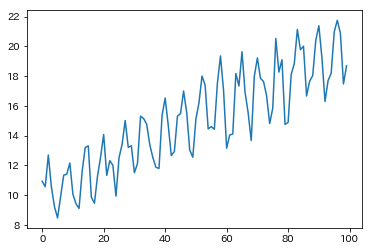

In [30]:
import matplotlib.pyplot as plt



plt.plot(data)
plt.show()

In [31]:
from fbprophet import Prophet

In [32]:
df = pd.DataFrame({'ds': pd.date_range(start ='2019-01-01' , periods=100),
              'y': data
             })
df.head()

,ds,y
0,2019-01-01,10.926736
1,2019-01-02,10.566290
2,2019-01-03,12.691400
3,2019-01-04,10.546845
4,2019-01-05,9.222062


In [33]:
m = Prophet()
m.fit(df)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [34]:
future = m.make_future_dataframe(periods=365)
future.tail()

,ds
460,2020-04-05
461,2020-04-06
462,2020-04-07
463,2020-04-08
464,2020-04-09


In [35]:
forecast = m.predict(future)

In [36]:
forecast.describe()

,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
count,465.000000,465.000000,465.000000,465.000000,465.000000,465.000000,465.000000,465.000000,465.000000,465.000000,465.000000,465.0,465.0,465.0,465.000000
mean,32.950136,30.822299,35.077395,32.940646,32.959315,0.000456,0.000456,0.000456,0.000456,0.000456,0.000456,0.0,0.0,0.0,32.950592
std,13.212119,13.220221,13.226760,13.203039,13.220945,0.406719,0.406719,0.406719,0.406719,0.406719,0.406719,0.0,0.0,0.0,13.220680
min,10.140991,7.627911,11.753095,10.140991,10.140991,-0.711731,-0.711731,-0.711731,-0.711731,-0.711731,-0.711731,0.0,0.0,0.0,9.723608
25%,21.544946,19.397330,23.495273,21.544681,21.545195,-0.145869,-0.145869,-0.145869,-0.145869,-0.145869,-0.145869,0.0,0.0,0.0,21.423138
50%,32.950127,30.829282,35.093240,32.943388,32.956463,-0.002238,-0.002238,-0.002238,-0.002238,-0.002238,-0.002238,0.0,0.0,0.0,33.046209
75%,44.355308,42.143264,46.439979,44.338536,44.371593,0.161687,0.161687,0.161687,0.161687,0.161687,0.161687,0.0,0.0,0.0,44.232173
max,55.760489,54.001201,58.388423,55.730662,55.790512,0.768495,0.768495,0.768495,0.768495,0.768495,0.768495,0.0,0.0,0.0,56.234022


In [37]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
460,2020-04-05,55.244072,53.236740,57.395150
461,2020-04-06,56.234022,54.001201,58.388423
462,2020-04-07,55.616639,53.320360,57.855918
463,2020-04-08,55.823856,53.787432,57.891108
464,2020-04-09,55.758251,53.723506,57.967663


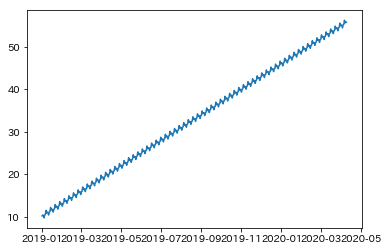

In [38]:
plt.plot(forecast['ds'], forecast['yhat'])

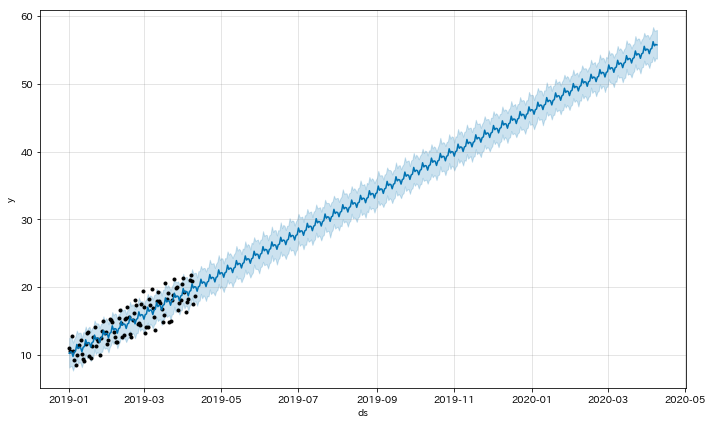

In [39]:
fig1 = m.plot(forecast)

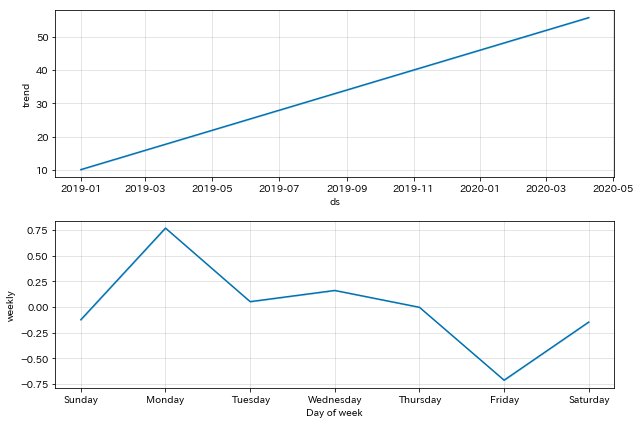

In [40]:
fig2 = m.plot_components(forecast)
